# Statistics for data science
This course aims to provide a brief and basic overview of core statistics concepts that are key to modern machine learning architecture. This tutorial grows progressively more difficult as the complexity of the concepts increase. 

## Probability
Probability is the study of randomness and uncertainty. It's a mathematical framework for quantifying uncertainty and updating it based on observation or evidence. In data science, understanding probability is necessary for working with data and making inferences about populations based on samples. Many machine learning algorithms - Naive Bayes, logistic regression, neural networks - are based on concepts from probability theory.

### Sample Spaces
The sample space of a probabilistic model is the set of all possible outcomes, called events. For example, roll a die, then the sample space is ${1, 2, 3, 4, 5, 6}$, and rolling each of `1,2,...,6` is an event.

### Probability Measures
A probability measure is a function that assigns probabilities to events in a sample space. These probabilities should some requirements:
* Nonnegativity: The probability of any event cannot be a negative number.
* Normalization: The probability of the entire sample space is 1, i.e the probabilities of each event in the sample space add up to 1.
* Countable additivity: For any countable sequence of disjoint events, the probability of the union of these events is the sum of their individual probabilities. In simpler terms, if we have a bunch of separate events, and we want to know the probability of any of them happening, we just need to add up the chances of each event happening on its own.

### Counting Methods
Counting methods are techniques to count the number of elements in a sample space or an event. The two basic methods are:
* Permutations: The number of ways to order $n$ distinct items is $n!$ (pronounced "n factorial").
* Combinations: The number of ways to choose $k$ items out of $n$ items without order is $C(n, k)$ (pronounced "n choose k") , computed as $n! / (k!(n-k)!)$.

### Conditional Probability and Independence
Conditional probability is a measure of the probability of an event occurring given that another event has already occurred. If the event of interest is $A$ and event $B$ has occurred, the conditional probability of $A$ given $B$ is written as $P(A|B)$.

Events $A$ and $B$ are independent if $A$ does not affect the probability of $B$, and vice versa. This is mathematically represented as $P(A ∩ B) = P(A)P(B)$.

Let's use Python code to simulate a simple probability problem - the roll of a die:

In [1]:
import random

# define the sample space
sample_space = [1, 2, 3, 4, 5, 6]

# roll the die 1000 times
rolls = [random.choice(sample_space) for _ in range(1000)]

# compute the empirical probability of each outcome
for outcome in sample_space:
    print(f"P({outcome}) = {rolls.count(outcome) / 1000}")

P(1) = 0.162
P(2) = 0.163
P(3) = 0.162
P(4) = 0.183
P(5) = 0.169
P(6) = 0.161


## Random Variables
Random variables are a core concept in statistics and probability theory. A random variable can be thought of as a function that maps from a sample space to the set of real numbers. It assigns a real number to each possible outcome. The term "random" refers to the fact that the outcome is determined by a random phenomenon. Understanding random variables is essential in data science. For instance, the features in a machine learning model can be considered as random variables, and the model itself as a function of these random variables. The type of random variable (discrete or continuous) can also determine the appropriate statistical methods or machine learning models to use.

### Discrete vs. Continuous Distributions
Random variables can be either discrete or continuous. Features in a machine learning model can be thought of as random variables.
* A discrete random variable has a countable number of possible values. Examples include the number of heads when flipping three coins (can be 0, 1, 2, or 3), or whether an email is ham or spam.
* A continuous random variable can take any value in a given range or interval. Something like the GDP of a country, or time.

### Functions of a Random Variable
A function of a random variable is just another random variable that's been transformed. For instance, if $X$ is a random variable, $Y = X^2$ is a function of a random variable. Machine learning models like logistic regression can be thought of as functions on random variables (features).

Here's a Python example showing the creation of a discrete random variable (the roll of a die), and a function of that random variable (the square of the roll). Why the square of the roll? Why not?

In [7]:
import numpy as np

# define the sample space and roll the die 1000 times
sample_space = [1, 2, 3, 4, 5, 6]
rolls = np.random.choice(sample_space, size=1000)

# define a function of the random variable
squares = rolls**2

# compute the empirical probability distribution of the rolls
print("Roll probabilities:")
for outcome in sample_space:
    print(f"P({outcome}) = {np.mean(rolls == outcome)}")

# compute the empirical probability distribution of the squares
print("\nSquare probabilities:")
for outcome in set(squares):
    print(f"P({outcome}) = {np.mean(squares == outcome)}")

Roll probabilities:
P(1) = 0.187
P(2) = 0.179
P(3) = 0.135
P(4) = 0.17
P(5) = 0.162
P(6) = 0.167

Squared probabilities:
P(0) = 0.0
P(1) = 0.0


## Joint Distributions
### Discrete Random Variables
The joint probability mass function (pmf) of two discrete random variables $X$ and $Y$ is the probability of their simultaneous occurrence, i.e., $P(X = x, Y = y)$.

### Continuous Random Variables
For two continuous random variables $X$ and $Y$, a joint probability density function (pdf) gives the density of their simultaneous occurrence.

### Independent Random Variables
Two random variables $X$ and $Y$ are independent if the occurrence of $X$ does not affect the occurrence of $Y$, and vice versa. For independent variables, the joint distribution is the product of the distribution of each variable.

### Conditional Distributions
The conditional distribution of $Y$ given $X$ is the distribution of $Y$ when we know that $X$ has taken on some value.

# Functions of Jointly Distributed Random Variables
Functions of jointly distributed random variables make new random variables. The distribution of these resulting random variables can sometimes be derived from the joint distribution of the original random variables.

Let's look at joint distributions with Python, using `numpy`.

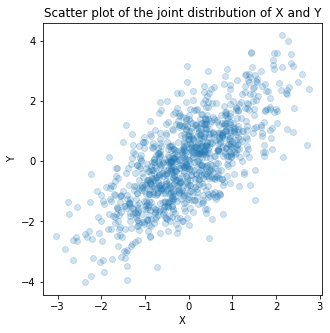

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# generate a sample of joint observations
np.random.seed(0)
x = np.random.normal(0, 1, 1000)
y = x + np.random.normal(0, 1, 1000)

# plot the joint distribution using a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(x, y, alpha=0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of the joint distribution of X and Y')
plt.show()

Here, $X$ and $Y$ are not independent as $Y$ is dependent on X. The scatter plot shows that as $X$ increases, $Y$ also tends to increase, which shows a positive correlation.

Joint distributions are core to multivariate statistics, which is important in data science when dealing with multiple variables or features. Concepts like conditional distributions are key to Bayesian inference and algorithms such as Naive Bayes.

## Expected Values
The expected value (or mean) of a random variable is an important concept in probability theory and statistics. It provides a measure of the "center" of the distribution of the random variable. Expected values and related concepts are fundamental to data science. For example, the mean and variance are basic descriptive statistics, the covariance and correlation are used to understand relationships between variables, and conditional expectations are used for prediction in machine learning algorithms.

### Expectation of Functions and Linear Combinations of Random Variables
The expectation is linear, which means for random variables $X$ and $Y$ and constants $a$ and $b$, we have $E(aX + bY) = aE(X) + bE(Y)$.

For a function $g(X)$ of a random variable $X$, the expected value of $g(X)$ is calculated as:
* If $X$ is discrete: $E(g(X)) = \sum_{x} g(x)P(X=x)$
* If $X$ is continuous: $E(g(X)) = \int_{-\infty}^{\infty} g(x)f_X(x) dx$

### Variance and Standard Deviation
The variance measures the dispersion of the random variable around its expected value. It's defined as $Var(X) = E((X - E(X))^2)$. The standard deviation is simply the square root of the variance.

### Covariance and Correlation
The covariance measures how two random variables vary together. It's defined as $Cov(X, Y) = E((X - E(X))(Y - E(Y)))$. The correlation is a normalized measure of the same thing, defined as $Corr(X, Y) = Cov(X, Y) / (\sqrt{Var(X)}\sqrt{Var(Y)})$.

### Conditional Expectation and Prediction
The conditional expectation of $Y$ given $X$ is the expected value of $Y$ when $X$ is known. It's used for prediction in statistics and machine learning.

### Moment-Generating Function
The moment-generating function of a random variable $X$ is defined as $M_X(t) = E(e^{tX})$. It's a useful tool because its derivatives at $t = 0$ give the moments of the distribution (mean, variance, etc).

Let's use Python to calculate some expected values:

In [4]:
import numpy as np

# generate a sample
np.random.seed(0)
X = np.random.normal(0, 1, 10000)

# calculate expectations
print(f"E(X) = {np.mean(X)}")
print(f"E(X^2) = {np.mean(X**2)}")
print(f"Var(X) = {np.var(X)}")

# generate a second sample
Y = X + np.random.normal(0, 1, 10000)

# calculate covariance and correlation
print(f"Cov(X, Y) = {np.cov(X, Y)[0, 1]}")
print(f"Corr(X, Y) = {np.corrcoef(X, Y)[0, 1]}")

E(X) = -0.018433720158265818
E(X^2) = 0.9756077773866701
Var(X) = 0.9752679753477971
Cov(X, Y) = 0.9677552462397109
Corr(X, Y) = 0.7023695160574317


## Limit Theorems
Limit theorems are fundamental theorems in probability theory and statistics that provide assurances of the behavior of large collections of random variables. Two important limit theorems are the Law of Large Numbers and the Central Limit Theorem.

### Law of Large Numbers (LLN)
The Law of Large Numbers states that as the number of independently and identically distributed (i.i.d.) random variables increases, their sample average converges to their expected value. This is a principle underlying frequentist statistics, which is the best kind of statistics.

Mathematically, if $X_1, X_2, ..., X_n$ are i.i.d. with expected value $E(X_i) = \mu$, then as $n \rightarrow \infty$, $\bar{X_n} = \frac{1}{n}(X_1 + X_2 + ... + X_n) \rightarrow \mu$ almost surely. Check it out.

### Convergence in Distribution and the Central Limit Theorem (CLT)
Convergence in distribution (or weak convergence) concerns the convergence of the distribution of a sequence of random variables. The most famous result about convergence in distribution is the Central Limit Theorem.

The Central Limit Theorem basicall says that the sum (or average) of a many i.i.d. random variables, each with finite mean and variance, will have a distribution that approaches a normal distribution.

Mathematically, if $X_1, X_2, ..., X_n$ are i.i.d. with $E(X_i) = \mu$ and $Var(X_i) = \sigma^2 < \infty$, then as $n \rightarrow \infty$, $\sqrt{n}(\bar{X_n} - \mu) \rightarrow N(0, \sigma^2)$ in distribution. Very useful in simulation modelling.

Let's illustrate:

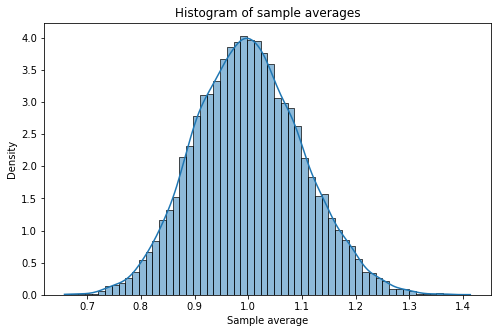

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# generate a large number of random variables
np.random.seed(0)
n = 10000
X = np.random.exponential(scale=1.0, size=(n, 100))

# compute the sample averages
averages = np.mean(X, axis=1)

# plot the histogram of the averages
plt.figure(figsize=(8, 5))
sns.histplot(averages, kde=True, stat='density')
plt.title('Histogram of sample averages')
plt.xlabel('Sample average')
plt.ylabel('Density')
plt.show()

This generates 10000 samples of 100 exponential random variables each, computes the sample average of each set, and plots the distribution of these averages. According to the Central Limit Theorem, this distribution should approximate a normal distribution. And indeed, they do.

The Law of Large Numbers and the Central Limit Theorem are the cornerstones of many methods in statistics and machine learning. They enable the theory of hypothesis testing, estimation, and many machine learning algorithms. For example, the Central Limit Theorem is why many machine learning methods assume that the errors are normally distributed. Whatever the distribution of each random error (which is unknown), enough random errors in succession will have a known distribution. That's powerful.

## Distributions Derived from the Normal Distribution
The normal distribution plays a key role in statistics due to the Central Limit Theorem. Some other important distributions are derived from it, including the chi-square, t, and F distributions. They are essential in statistical inference, including tests of significance and confidence intervals for means, variances, and proportions. These distributions are use all the time in data science applications, like A/B testing, regression, and model evaluation.

### Chi-Square Distribution
If $Z_1, Z_2, ..., Z_k$ are independent standard normal random variables (i.e., $N(0,1)$), then the sum of their squares $Q = Z_1^2 + Z_2^2 + ... + Z_k^2$ follows a chi-square distribution with $k$ degrees of freedom, denoted $Q \sim \chi^2(k)$.

The chi-square distribution is used in hypothesis testing, especially for tests of independence in contingency tables and goodness-of-fit tests.

### t Distribution
The t-distribution arises when we estimate the mean of a normally distributed population in situations where the sample is small and population standard deviation unknown.

If $Z \sim N(0,1)$ and $Q \sim \chi^2(k)$ are independent, then the random variable $T = \frac{Z}{\sqrt{Q/k}}$ follows a t-distribution with $k$ degrees of freedom, denoted $T \sim t(k)$.

The t-distribution is used in the Student's t-test for assessing the statistical significance of the difference between two sample means.

### F Distribution
The F-distribution arises when comparing statistical models in analysis of variance (ANOVA), regression analysis, and tests of equality of variances.

If $Q_1 \sim \chi^2(k_1)$ and $Q_2 \sim \chi^2(k_2)$ are independent, then the random variable $F = \frac{Q_1/k_1}{Q_2/k_2}$ follows an F-distribution with $k_1$ and $k_2$ degrees of freedom, denoted $F \sim F(k_1, k_2)$.

### Sample Mean and Sample Variance
The sample mean $\bar{X}$ and sample variance $S^2$ of a sample from a normal distribution have important properties:
* The sample mean $\bar{X}$ follows a normal distribution with mean equal to the population mean and variance equal to the population variance divided by the sample size.
* The scaled sample variance $(n-1)S^2/\sigma^2$ follows a chi-square distribution with $n-1$ degrees of freedom, where $\sigma^2$ is the population variance.

These properties underlie many statistical procedures, such as t-tests and ANOVA.

To illustrate, let's generate some data and compute sample means and variances in Python:

In [6]:
import numpy as np

# generate a large number of samples
np.random.seed(0)
samples = np.random.normal(0, 1, (10000, 50))

# compute sample means and variances
sample_means = np.mean(samples, axis=1)
sample_vars = np.var(samples, axis=1, ddof=1)

# print mean and variance of the sample means and variances
print(f"Mean of sample means: {np.mean(sample_means)}")
print(f"Variance of sample means: {np.var(sample_means)}")
print(f"Mean of sample variances: {np.mean(sample_vars)}")
print(f"Variance of sample variances: {np.var(sample_vars)}")

Mean of sample means: 0.002633204402474259
Variance of sample means: 0.019463107936223037
Mean of sample variances: 0.9993247235392384
Variance of sample variances: 0.040135674845348135


## Survey Sampling
Sampling is a process of selecting a subset of individuals from a population to estimate characteristics of the entire population.

### Population Parameters
A population is a complete set of items or individuals that we are interested in. Parameters are summary values about the population, such as the mean ($\mu$), proportion ($p$), or standard deviation ($\sigma$).

### Simple Random Sampling
Simple Random Sampling (SRS) is a basic method where we select a group of subjects (a sample) for study from a larger group (a population). Each individual is chosen entirely randomly and has the same probability of being chosen (uniform).

### Estimation of a Ratio
Ratios are estimated from survey samples. For example, the proportion of a population in a certain category can be estimated as the ratio of the number of individuals in that category to the total sample size.

### Stratified Random Sampling
In stratified random sampling, the population is divided into non-overlapping groups, called strata, and a simple random sample is drawn from each group. This method can get more precise estimates when the population is heterogeneous.

Let's do some simple random sampling with Python, with the `pandas` library:

In [8]:
import pandas as pd
import numpy as np

# create a population DataFrame
np.random.seed(0)
population = pd.DataFrame({
    'age': np.random.randint(20, 80, size=10000),
    'income': np.random.randint(20000, 80000, size=10000)
})

# take a simple random sample
sample = population.sample(100)

# print the mean age and income in the population and the sample
print(f"Population mean age: {population['age'].mean()}, income: {population['income'].mean()}")
print(f"Sample mean age: {sample['age'].mean()}, income: {sample['income'].mean()}")

Population mean age: 49.4705, income: 49866.2447
Sample mean age: 50.12, income: 47324.84


We create a population of 10,000 individuals with `age` and `income` attributes, then draw a simple random sample of 100 individuals from this population. We then compare the mean `age` and `income` in the population and the sample.

Survey sampling is a fundamental aspect of applied statistics and is used whenevr data needs to be collected. In data science, survey sampling techniques can be applied in contexts like A/B testing, experiment design, and bootstrap resampling.

## Estimation of Parameters and Fitting of Probability Distributions
Parameter estimation and distribution fitting are important aspects of statistical analysis. The aim is to find the model, described by its parameters, that best fits the observed data.

### Parameter Estimation
Parameter estimation involves choosing parameters that best fit the observed data. Two popular methods for parameter estimation are the method of moments and the method of maximum likelihood. Let's create a random Poisson-distributed sample, and then estimate λ using both the method of moments and MLE:

In [10]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats

# True λ
lambda_true = 4

# Generate Poisson-distributed sample
np.random.seed(0)  # for reproducibility
sample = np.random.poisson(lambda_true, 1000)

#### Method of Moments
The method of moments involves equating sample moments (like the sample mean or variance) with theoretical moments and solving for the parameters. It's very easy in Python:

In [11]:
# Method of Moments estimation for λ
lambda_mom = np.mean(sample)
print(f"Method of Moments estimate of λ: {lambda_mom}")

Method of Moments estimate of λ: 3.967


#### Method of Maximum Likelihood
The method of maximum likelihood involves choosing the parameters to maximize the likelihood, which is the probability of observing the given data under the model. For a given set of data $x_1, x_2, ..., x_n$, the likelihood is usually written as $L(\theta; x_1, x_2, ..., x_n)$, where $\theta$ represents the parameters. Very mathy, but easy to illustrate using our Poisson sample:

In [12]:
# Define the Poisson likelihood function
def neg_log_likelihood(lambda_, sample):
    return -np.sum(stats.poisson.logpmf(sample, lambda_))

# MLE estimation for λ
result = minimize(neg_log_likelihood, 1, args=(sample,), method='Nelder-Mead')
lambda_mle = result.x[0]
print(f"Maximum Likelihood Estimate of λ: {lambda_mle}")

Maximum Likelihood Estimate of λ: 3.966992187500006


For our example, both methods yield the same result, but this won't always be the case. For some distributions, the MLE can be biased, whereas the method of moments estimator is always unbiased. But, in most cases, the MLE has lower variance than the method of moments estimator, meaning it's more accurate for large samples.



### Large Sample Theory and Confidence Intervals
As the sample size gets large, the maximum likelihood estimates (MLEs) behave nicely: they converge to the true parameter values (consistency), and their distribution becomes more and more concentrated and normally distributed around the true parameter (asymptotic normality). This property allows us to construct confidence intervals for the parameters.

### Bayesian Parameter Estimation
In the Bayesian approach, the parameters are considered random and are described by a probability distribution, called the prior distribution. After observing data, the prior is updated to the posterior distribution. 

### Efficiency and the Cramer-Rao Lower Bound
The Cramer-Rao Lower Bound gives a lower bound on the variance of any unbiased estimator of a parameter. An estimator that achieves this lower bound is called efficient.

Let's again create a sample of data from a Poisson distribution, and then compute the MLE for λ. We'll compute the CRLB and compare the variance of our MLE to the CRLB.

In theory, for a Poisson distribution, the CRLB is 1/λ and the MLE is unbiased and its variance equals to 1/λ. Therefore, the efficiency of the MLE is 1, which means it reaches the CRLB and is the most efficient estimator. But let Python prove it:


### Sufficiency, Factorization, and the Rao-Blackwell Theorem
A statistic is sufficient for a parameter if it contains all the information in the data about that parameter. The factorization theorem provides a criterion for sufficiency. The Rao-Blackwell theorem shows how to improve an estimator by conditioning on a sufficient statistic.

## Testing Hypotheses and Assessing Goodness-of-Fit
Hypothesis testing and goodness-of-fit assessments are used in data science to test assumptions and verify the fit of models to data.

### The Neyman-Pearson Paradigm
The Neyman-Pearson paradigm is a framework for hypothesis testing. The main components are:
* Null hypothesis ($H_0$): A statement about the parameters of the population that is assumed to be true.
* Alternative hypothesis ($H_1$ or $H_a$): A statement contradicting the null hypothesis.
* Test statistic: A function of the sample data that is used to decide whether to reject the null hypothesis.
* Rejection region (or critical region): The set of values for the test statistic for which we reject the null hypothesis.

The procedure is to compute the test statistic from the sample data and reject the null hypothesis if the test statistic lies in the rejection region.

### The Duality of Confidence Intervals and Hypothesis Tests
There's a duality between confidence intervals and hypothesis tests: a value is in a 95% confidence interval if and only if the hypothesis that the parameter equals that value is not rejected at the 5% significance level.

### Generalized Likelihood Ratio Tests
The Generalized Likelihood Ratio Test is a method of performing hypothesis tests based on the ratio of the maximum values of the likelihood function under the null and alternative hypotheses.

#### Likelihood Ratio Tests for the Multinomial Distribution and the Poisson Dispersion Test
These are specific instances of likelihood ratio tests. The former is used when the data are categorical and follow a multinomial distribution, and the latter is used to test whether a Poisson distribution has a particular value of its parameter.

### Hanging Rootograms
A rootogram is a graphical method for comparing an observed data distribution with another (theoretical or estimated) distribution. The observed data are displayed as bars, and the expected frequencies under the theoretical distribution are displayed as dots. A "hanging" rootogram is a variation where the bars "hang" from the dots, so differences between the distributions show as gaps between the bars and the horizontal axis.

Unfortunately, Python doesn't have a built-in function for creating hanging rootograms, but they can be created using a combination of bar and scatter plots.

### Probability Plots
Probability plots (also called QQ plots or quantile-quantile plots) are used to assess if a dataset follows a particular theoretical distribution. They plot the quantiles of the dataset against the quantiles of the theoretical distribution. If the data follows the specified distribution, the points should approximately lie on a straight line.

Here's how you can create a normal probability plot in Python using the `scipy.stats` library:

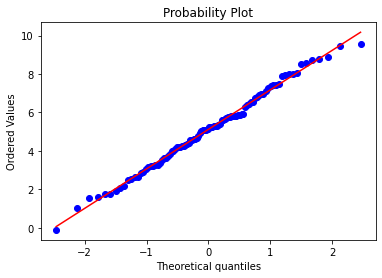

In [21]:
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt

# generate a sample from a normal distribution
np.random.seed(0)
sample = np.random.normal(loc=5, scale=2, size=100)

# create a normal probability plot
probplot(sample, dist="norm", plot=plt)
plt.show()

We generate a sample from a normal distribution and create a normal probability plot. If the sample follows a normal distribution, the points should approximately lie on a straight line.

### Tests for Normality
Tests for normality are used to check whether a dataset follows a normal distribution. Here are a few common methods:
* Shapiro-Wilk test: The Shapiro-Wilk test null hypothesis is that the population is normally distributed. If the p-value is less than the chosen alpha level, the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.
* Anderson-Darling test: The Anderson-Darling test makes use of the specific distribution in calculating critical values. This has the advantage of allowing a specific hypothesis to be tested.
* Lilliefors test: The Lilliefors test is a normality test based on the Kolmogorov-Smirnov test. It is used for situations where the parameters of the normal distribution (mean and standard deviation) are not known but are estimated from the data.

Here's a quick example on how you can perform the Shapiro-Wilk test in Python using the `scipy.stats` library:

In [24]:
from scipy.stats import shapiro

# null hypothesis: the sample is drawn from a normal distribution
w_statistic, p_value = shapiro(sample)

print(f"W statistic: {w_statistic}")
print(f"P value: {p_value}")

W statistic: 0.9926937818527222
P value: 0.8689165711402893


In this code, we perform the Shapiro-Wilk test on the sample. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data do not come from a normal distribution.

## Summarizing Data
Summarizing data requires describing, visualizing, and understanding the key features of a dataset. This is the first step in any data analysis process.

### Methods Based on Cumulative Distribution
The cumulative distribution function (CDF) gives the probability that a random variable is less than or equal to a certain value. It can be used to summarize and visualize a dataset.

Here's how to plot the empirical CDF of a dataset in Python:

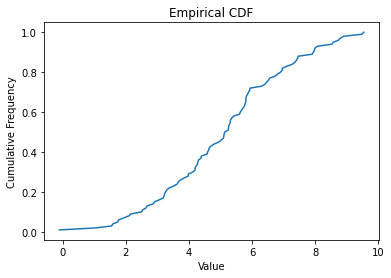

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# generate a sample from a normal distribution
np.random.seed(0)
sample = np.random.normal(loc=5, scale=2, size=100)

# compute the empirical CDF
sample_sorted = np.sort(sample)
ecdf = np.arange(1, len(sample)+1) / len(sample)

# plot the empirical CDF
plt.plot(sample_sorted, ecdf, label='ECDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('Empirical CDF')
plt.show()

Here we generate a sample from a normal distribution, compute the empirical CDF, and plot it.

### Histograms, Density Curves, and Stem-and-Leaf Plots
Histograms, density curves, and stem-and-leaf plots are other methods for visualizing and summarizing data.

A histogram is a graphical representation of the distribution of a dataset. It estimates the probability distribution of a continuous variable.

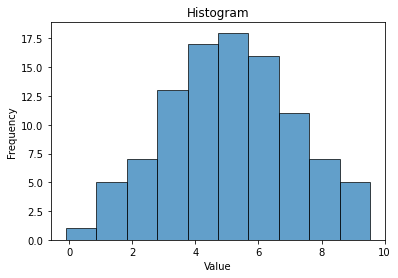

In [26]:
# plot a histogram of the sample
plt.hist(sample, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

A density curve is a smoothed version of a histogram and can give an overview of the distribution of a dataset.

c:\Users\AB012DH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


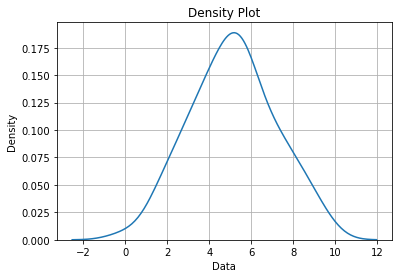

In [28]:
import seaborn as sns

sns.distplot(sample, hist = False, kde = True)
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Density Plot')
plt.grid(True)
plt.show()

Stem-and-leaf plots are a method for showing the frequency with which certain classes of values occur. You could think of it as a form of histogram where the values are grouped into "stems" and "leaves".

Unfortunately, Python's plotting libraries do not natively support stem-and-leaf plots, but they can be constructed using basic string formatting functions.

### Measures of Location and Dispersion
The most common measures of location (or central tendency) are the mean and median, and the most common measures of dispersion (or variability) are the variance, standard deviation, and interquartile range (IQR).

In [29]:
# compute measures of location and dispersion
mean = np.mean(sample)
median = np.median(sample)
variance = np.var(sample, ddof=1)  
std_dev = np.std(sample, ddof=1)
iqr = np.percentile(sample, 75) - np.percentile(sample, 25)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")

Mean: 5.11961603106897
Median: 5.188192238875996
Variance: 4.1043499766259846
Standard Deviation: 2.0259195385370035
IQR: 2.761868070249223


### Boxplots
A boxplot (also known as a box-and-whisker plot) is a graphical representation of a five-number summary of a dataset: the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum.

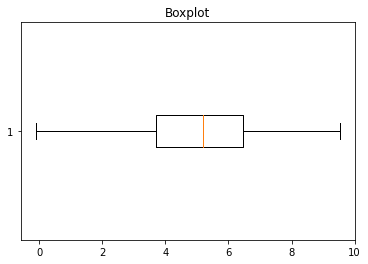

In [30]:
# create a boxplot of the sample
plt.boxplot(sample, vert=False)
plt.title('Boxplot')
plt.show()

### Scatterplots
A scatterplot is a graphical representation of the relationship between two variables.

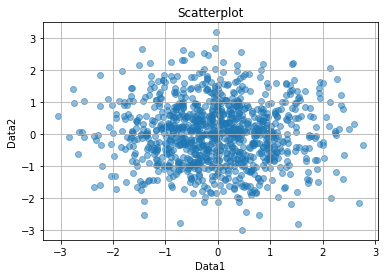

In [31]:
np.random.seed(0)
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

plt.scatter(data1, data2, alpha=0.5)
plt.title('Scatterplot')
plt.xlabel('Data1')
plt.ylabel('Data2')
plt.grid(True)
plt.show()

## Comparing Two Samples
Comparing two samples is a common task in statistics and data science, and allows us to infer differences between two different groups or populations.

### Comparing Two Independent Samples
#### Methods Based on Normal Distribution
For comparing two independent samples, one common approach is to use the two-sample t-test, which assumes that the data are normally distributed and have the same variance in both groups.

The null hypothesis for the test is that the means of the two groups are equal, and the alternative hypothesis is that they are not. The test statistic for this is:

$t=(\bar{X}_1-\bar{X}_2)/\sqrt{(s_1^2/n_1)+(s_2^2/n_2)}$

where $\bar{X}_1$ and $\bar{X}_2$ are the sample means, ${s_1}^2$ and ${s_2}^2$ are the sample variances, and $n_1$ and $n_2$ are the sample sizes.

We can conduct a two-sample t-test in Python:

In [34]:
from scipy.stats import ttest_ind

np.random.seed(0)
sample1 = np.random.randn(100)
sample2 = np.random.randn(100)

t_statistic, p_value = ttest_ind(sample1, sample2)

print(f"t statistic: {t_statistic}")
print(f"p value: {p_value}")

t statistic: -0.15295815048595532
p value: 0.8785870431170582


#### Power
The power of a statistical test is the probability that the test will reject the null hypothesis when the alternative hypothesis is true. The power depends on the significance level, the sample size, and the effect size.

We can calculate the power of a t-test in Python using the `power` module from the `statsmodels` library:

In [35]:
from statsmodels.stats.power import TTestIndPower

effect_size = (np.mean(sample1) - np.mean(sample2)) / np.sqrt(((99*np.var(sample1) + 99*np.var(sample2)) / 200))
alpha = 0.05 # significance level
nobs1 = len(sample1)
ratio = len(sample2) / len(sample1)

power = TTestIndPower().solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=ratio)

print(f"Power: {power}")

Power: 0.052712497236760844


#### Nonparametric Approach: Mann-Whitney Test
The Mann-Whitney U test is a nonparametric test that can be used to determine whether there are differences between two independent groups. It is useful when the assumptions of the t-test are violated.

In [36]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(sample1, sample2)

print(f"U statistic: {u_statistic}")
print(f"p value: {p_value}")

U statistic: 5010.0
p value: 0.9814810114823133


#### Bayesian Approach
Bayesian methods can be used to compare two samples by estimating the posterior distribution of the difference between the group means. This can be done using `PyMC3`, a Python library for probabilistic programming:

In [37]:
import pymc3 as pm

with pm.Model() as model:
    # priors
    mu1 = pm.Normal("mu1", mu=0, sigma=1)
    mu2 = pm.Normal("mu2", mu=0, sigma=1)
    sigma1 = pm.HalfNormal("sigma1", sigma=1)
    sigma2 = pm.HalfNormal("sigma2", sigma=1)

    # likelihoods
    likelihood1 = pm.Normal("sample1", mu=mu1, sigma=sigma1, observed=sample1)
    likelihood2 = pm.Normal("sample2", mu=mu2, sigma=sigma2, observed=sample2)

    # calculate the difference between the means
    diff_of_means = pm.Deterministic("difference of means", mu1 - mu2)

    # inference
    trace = pm.sample(2000)

pm.plot_posterior(trace, var_names=["mu1", "mu2", "difference of means"], ref_val=0)

  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529976 sha256=a20b4fee4146875b20090236b75aba4553aed035a4d66859a186e1d1f12b3452
  Stored in directory: c:\users\ab012dh\appdata\local\pip\cache\wheels\04\22\4d\832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.1
    Uninstalling xarray-0.20.1:
      Successfully uninstalled xarray-0.20.1


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
c:\Users\AB012DH\Anaconda3\lib\site-packages\theano\scalar\basic.py:2412: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Comparing Paired Samples
When we want to compare two related samples or repeated measures on the same group, we can use paired sample tests.

#### Methods Based on Normal Distribution
The paired sample t-test can be used when the samples are normally distributed. The null hypothesis is that the mean difference between the paired samples is zero.

In [38]:
from scipy.stats import ttest_rel

np.random.seed(0)
paired_sample1 = np.random.randn(100)
paired_sample2 = paired_sample1 + np.random.randn(100) * 0.1

t_statistic, p_value = ttest_rel(paired_sample1, paired_sample2)

print(f"t statistic: {t_statistic}")
print(f"p value: {p_value}")

t statistic: -0.7886776690076786
p value: 0.4321849976235336


#### Nonparametric Approach: Signed Rank Test
The Wilcoxon signed-rank test is a nonparametric test that can be used to determine whether there are differences between two paired groups. It is useful when the assumptions of the paired sample t-test are violated.

In [39]:
from scipy.stats import wilcoxon

w_statistic, p_value = wilcoxon(paired_sample1, paired_sample2)

print(f"W statistic: {w_statistic}")
print(f"p value: {p_value}")

W statistic: 2384.0
p value: 0.6278155248427884


## Analysis of Variance (ANOVA)
ANOVA is a statistical method used to test differences between two or more means. It tests if the means of various groups are different by analyzing variances.

### One-way layout
#### Normal Theory; the F test
A one-way ANOVA uses one categorical independent variable. It is called "one-way" because there is only one way to group the same set of data.

The null hypothesis (H0) for the test is that all group means are equal, while the alternative hypothesis (Ha) is that at least one group mean is different from the others.

The test statistic for a one-way ANOVA is the F-statistic, given by:

$F=MSW/MSB$

where $MSB$ is the mean square between the groups (explained variance) and $MSW$ is the mean square within the groups (unexplained variance).

In [40]:
import scipy.stats as stats

# generate three different random samples
np.random.seed(0)
group1 = np.random.normal(0, 1, 50)
group2 = np.random.normal(0.5, 1, 50)
group3 = np.random.normal(1, 1, 50)

# perform one-way ANOVA
F, p = stats.f_oneway(group1, group2, group3)

print(f"F statistic: {F}")
print(f"p-value: {p}")

F statistic: 15.606322266128343
p-value: 7.142385124664052e-07


#### Problems of Multiple Comparisons
When performing multiple pairwise comparisons, the chance of a Type I error (rejecting a true null hypothesis) increases. This is known as the multiple comparisons problem. One common solution is the Bonferroni correction, which adjusts the significance level by dividing it by the number of comparisons.

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# stack the data
data = np.hstack((group1, group2, group3))
# create labels for the data
labels = ['group1']*50 + ['group2']*50 + ['group3']*50

# perform multiple pairwise comparison (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
group1 group2   0.3385 0.2271 -0.1465 0.8235  False
group1 group3    1.116    0.0   0.631  1.601   True
group2 group3   0.7775 0.0006  0.2925 1.2625   True
---------------------------------------------------


#### Nonparametric Approach: The Kruskal-Wallis Test
The Kruskal-Wallis H test is a non-parametric method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann-Whitney U test, which is used for comparing only two groups.

In [ ]:
H, p = stats.kruskal(group1, group2, group3)

print(f"H statistic: {H}")
print(f"p-value: {p}")

### Two-way layout
#### Normal Theory for Two-way ANOVA
A two-way ANOVA is used to estimate how the mean of a quantitative variable changes according to the levels of two categorical variables.

Python's `statsmodels` library offers a function to perform two-way ANOVA.

In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create a simple data frame
np.random.seed(0)
data = pd.DataFrame({
    'response': np.random.normal(loc=0, scale=1, size=60),
    'group1': np.repeat(['A', 'B', 'C'], 20),
    'group2': np.tile(np.repeat(['D', 'E'], 10), 3)
})

# fit model
model = ols('response ~ C(group1) + C(group2)', data).fit()

# perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df         F    PR(>F)
C(group1)   9.314140   2.0  4.501874  0.015381
C(group2)   0.151098   1.0  0.146063  0.703773
Residual   57.930518  56.0       NaN       NaN


#### Randomized Block Design
In a randomized block design, the variability within the data can be reduced by grouping similar experimental units into blocks.

In [43]:
# fit model
model = ols('response ~ C(group1) + C(group2) + C(group1):C(group2)', data).fit()

# perform two-way ANOVA with interaction
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq    df         F    PR(>F)
C(group1)             9.314140   2.0  4.436187  0.016452
C(group2)             0.151098   1.0  0.143931  0.705891
C(group1):C(group2)   1.241790   2.0  0.591446  0.557072
Residual             56.688728  54.0       NaN       NaN


#### Nonparametric Approach: Friedman's Test
The Friedman test is a non-parametric statistical test developed by Milton Friedman. Similar to the parametric repeated measures ANOVA, it is used to detect differences in treatments across multiple test attempts.

In [44]:
from scipy.stats import friedmanchisquare

# assuming group1, group2, group3 are paired
chi_square, p_value = friedmanchisquare(group1, group2, group3)

print(f"Chi-square statistic: {chi_square}")
print(f"p-value: {p_value}")

Chi-square statistic: 13.440000000000055
p-value: 0.0012065382139580072


## Analysis of Categorical Data
Analysis of categorical data involves the use of data that can be divided into various categories but have no order or priority. It's important to note that when analyzing categorical data, the variables under study should be categorical and the data should be a random sample. Additionally, the groups should be independent.

### Fisher's Exact Test
Fisher's Exact Test is used for categorical data when sample sizes are small. It is named after its inventor, R.A. Fisher, and is a statistical significance test. The test is used to determine whether there are non-random associations between two categorical variables.

Here how to perform Fisher's Exact Test in Python:

In [46]:
import scipy.stats as stats

# create a 2x2 contingency table
table = [[8, 2],
         [1, 5]]

# perform Fisher's exact test
oddsratio, p_value = stats.fisher_exact(table)

print(f"Odds Ratio: {oddsratio}")
print(f"p-value: {p_value}")

Odds Ratio: 20.0
p-value: 0.034965034965034975


### The Chi-Square Test of Homogeneity
This test is used when the data is collected from multiple populations and you want to see if all populations have the same proportions for a categorical variable.

### The Chi-Square Test of Independence
A Chi-Square test of independence tests the hypothesis that two categorical variables are independent.

In [ ]:
from scipy.stats import chi2_contingency

# Sample data
# Independence: data from one population
# Question: Are job and preference for R or Python independent?
data_independence = [[60, 70],  # Statistician
                     [65, 85]]  # Programmer

# Homogeneity: data from two populations
# Question: Do statisticians and programmers have similar preferences for R or Python?
data_homogeneity = [[200, 150],  # Population 1
                    [180, 170]]  # Population 2

# Run chi-square tests
chi2_independence, p_independence, _, _ = chi2_contingency(data_independence)
chi2_homogeneity, p_homogeneity, _, _ = chi2_contingency(data_homogeneity)

print(f"Chi-Square Test for Independence: Chi2 = {chi2_independence}, p = {p_independence}")
print(f"Chi-Square Test for Homogeneity: Chi2 = {chi2_homogeneity}, p = {p_homogeneity}")

Chi-Square Test for Independence: Chi2 = 0.1245803143093459, p = 0.7241189033676917
Chi-Square Test for Homogeneity: Chi2 = 2.078125, p = 0.14942362513460408


### Odds Ratios
An odds ratio (OR) is a statistic that quantifies the strength of the association between two events, A and B. The odds ratio is defined as the ratio of the odds of A in the presence of B and the odds of A in the absence of B, or equivalently (due to symmetry), the ratio of the odds of B in the presence of A and the odds of B in the absence of A.

Here is an example of how to calculate the odds ratio in Python:

In [50]:
# calculate odds ratio
oddsratio = (table[0][0] / table[0][1]) / (table[1][0] / table[1][1])

print(f"Odds Ratio: {oddsratio}")

Odds Ratio: 0.5


## Linear Least Squares
Linear least squares is a mathematical method used to solve over-determined systems, in other words, when there are more equations than unknowns.

### Simple Linear Regression
Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
* One variable, denoted $x$, is regarded as the predictor, explanatory, or independent variable.
* The other variable, denoted $y$, is regarded as the response, outcome, or dependent variable.

Slope: 2.218135929467866
Intercept: 0.16671610185904417
Correlation Coefficient: 0.7870204624733066
p-value: 0.00689911473073979


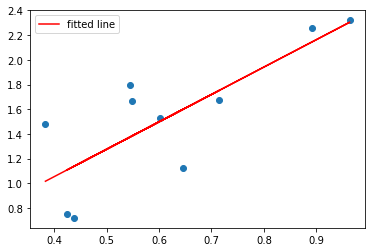

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# create some random data
np.random.seed(0)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

# perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation Coefficient: {r_value}")
print(f"p-value: {p_value}")

# plot data and regression line
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

### The Matrix Approach to Linear Least Squares
The matrix approach to Linear Least Squares involves using matrix algebra to perform linear regression. Here's an example using the `numpy` library:

In [52]:
# create matrix X using x and a column of ones
X = np.stack([x, np.ones(len(x))], axis=1)

# calculate the least-squares solution
w = np.linalg.lstsq(X, y, rcond=None)[0]

# print the slope and intercept
print("Slope: ", w[0])
print("Intercept: ", w[1])

Slope:  2.2181359294678655
Intercept:  0.16671610185904406


### Statistical Properties of Least Squares Estimates
The least squares estimates have certain statistical properties:
* They are unbiased, i.e., the expected value of the estimate is equal to the true value.
* Among all linear unbiased estimators, the least squares estimates have the smallest variance (Gauss-Markov theorem).
* They are normally distributed if the errors are normally distributed.

The standard errors of the estimates can be used to perform inference on the coefficients (confidence intervals, hypothesis tests).

### Multiple Linear Regression
In multiple linear regression, we predict the output based on multiple inputs.

In [53]:
import statsmodels.api as sm

# add a second independent variable
z = np.random.random(10)

# add constant to predictors and fit model
predictors = sm.add_constant(np.column_stack((x, z)))
model = sm.OLS(y, predictors)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     10.27
Date:                Wed, 31 May 2023   Prob (F-statistic):            0.00828
Time:                        14:00:24   Log-Likelihood:               -0.79943
No. Observations:                  10   AIC:                             7.599
Df Residuals:                       7   BIC:                             8.507
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0980      0.347      0.282      0.7

C:\Users\AB012DH\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Conditional Inference, Unconditional Inference, and the Bootstrap
In general, inference can be conditional (conditioned on the predictors) or unconditional (marginal over the distribution of the predictors). 

#### Conditional inference
This refers to the process of making conclusions about a population parameter based on data, where the conclusion depends on the particular sample that was observed. For example, if you're interested in understanding the relationship between two variables, you might perform a t-test to see if the difference in their means is statistically significant. Your conclusion (reject or fail to reject the null hypothesis of equal means) would be conditional on the particular data you collected.

#### Unconditional inference
Unconditional inference, on the other hand, doesn't condition on the observed data. Instead, it takes into account the sampling process and the probability model for the entire population. Unconditional inference is often more complex to carry out, but it can provide a broader view of the population.

For example, suppose you're studying the effect of a new call script on marketing campaign efficacy. In a conditional analysis, you might compare the mean efficacy score of telemarketers using the new script to the mean score of telemarketers using the old script. In an unconditional analysis, you might model the probability that a randomly chosen telemarketer would score above a certain threshold, taking into account both the script and other factors like the marketer's prior campaign performance.

#### Bootstrap
Bootstrap is a powerful resampling method used to estimate the sampling distribution of a statistic. By repeatedly sampling (with replacement) from the observed data and recalculating the statistic of interest, you can build up an empirical picture of the statistic's sampling distribution.

This is particularly useful when the theoretical distribution of the statistic is complex or unknown. Bootstrap can be used to calculate confidence intervals, conduct hypothesis tests, and estimate the standard error of a statistic.

Here's an example of how you might use bootstrap to estimate a 95% confidence interval for the mean of a sample in Python:

In [55]:
from sklearn.utils import resample

# original sample
data = np.array([1, 2, 3, 4, 5])

# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=1000, random_state=1)

# calculate the mean of the bootstrap sample
boot_mean = boot.mean()

# estimate 95% confidence interval
lower = np.percentile(boot, 2.5)
upper = np.percentile(boot, 97.5)

print(f'Bootstrap Mean: {boot_mean}')
print(f'95% confidence interval: ({lower}, {upper})')

Bootstrap Mean: 3.022
95% confidence interval: (1.0, 5.0)


### Local Linear Smoothing
Local linear smoothing is a method used to smooth noisy data. It's often used in non-parametric regression.

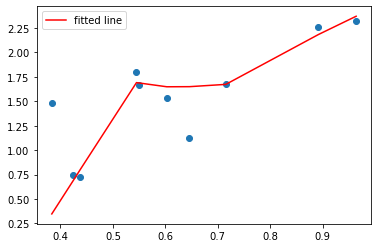

In [54]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# perform lowess smoothing
smoothed = lowess(y, x)

plt.scatter(x, y)
plt.plot(smoothed[:, 0], smoothed[:, 1], 'r', label='fitted line')
plt.legend()
plt.show()